## import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [36]:
#데이터 불러오기

data_path = "./csv_data"


train_df = pd.read_csv(data_path + '/train.csv', index_col=0)
test_df = pd.read_csv(data_path+"/test.csv", index_col=0)
val_df = pd.read_csv(data_path+"/val.csv", index_col=0)

train_df.head()

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,./clothes_dataset\blue_shorts\256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,./clothes_dataset\red_pants\584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,./clothes_dataset\green_pants\ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,./clothes_dataset\brown_shorts\c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,./clothes_dataset\white_dress\551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [40]:
train_df['image']

0       ./clothes_dataset\blue_shorts\256d854b55ac32ea...
1       ./clothes_dataset\red_pants\584f778aece14f07c2...
2       ./clothes_dataset\green_pants\ec543ca241cefb2b...
3       ./clothes_dataset\brown_shorts\c8db9e0f7010592...
4       ./clothes_dataset\white_dress\551373c80717c5b0...
                              ...                        
5573    ./clothes_dataset\black_shoes\31e11164a2a206ec...
5574    ./clothes_dataset\white_shoes\00271191db9b1fd6...
5575    ./clothes_dataset\black_pants\afa29481cd27a475...
5576    ./clothes_dataset\green_shoes\aaeba68f98a07bf7...
5577    ./clothes_dataset\white_dress\d58b9b44af525933...
Name: image, Length: 5578, dtype: object

In [34]:
#이미지 제너레이터 정의 및 모델 구성하기

train_datagen = ImageDataGenerator(rescale = 1./255)
val_dataget = ImageDataGenerator(rescale=1./255)

def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0:
        return (num_samples // batch_size) + 1
    else:
        return num_samples // batch_size
    
model = Sequential()
model.add(Flatten(input_shape=(112,112,3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='sigmoid'))
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [44]:
batch_size = 32
class_col = ['black', 'blue', 'brown','green', 'red', 'white','dress','shirt', 'pants','shorts','shoes']

#flow_from_dataframe : 데이터프레임을 활용하여 이미지를 불러오고 학습을 진행할 수 있게 하는 함수
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,directory='./csv_data',x_col='image',y_col=class_col,target_size=(112,112),
                                                   color_mode='rgb',class_mode='other',batch_size=batch_size,seed=42)

val_generator = val_dataget.flow_from_dataframe(dataframe=val_df, directory='./csv_data',x_col='image',y_col=class_col, target_size=(112,112),
                                               color_mode='rgb',class_mode='other',batch_size=batch_size, shuffle=True)

--- Logging error ---
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 1025, in emit
    msg = self.format(record)
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 869, in format
    return fmt.format(record)
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 608, in format
    record.message = record.getMessage()
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 

Found 5578 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 1025, in emit
    msg = self.format(record)
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 869, in format
    return fmt.format(record)
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 608, in format
    record.message = record.getMessage()
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 

Found 2391 validated image filenames.


In [45]:
model.fit(train_generator, steps_per_epoch=get_steps(len(train_df), batch_size), validation_data=val_generator,
val_dataget = ImageDataGenerator(rescale=1./255)
         validation_steps=get_steps(len(val_df), batch_size), epochs=10)

Epoch 1/10
175/175 [==============================] - 76s 434ms/step - loss: 0.5977 - accuracy: 0.3266 - val_loss: 0.3463 - val_accuracy: 0.4199
Epoch 2/10
175/175 [==============================] - 75s 427ms/step - loss: 0.2978 - accuracy: 0.4188 - val_loss: 0.2881 - val_accuracy: 0.3973
Epoch 3/10
175/175 [==============================] - 75s 429ms/step - loss: 0.2438 - accuracy: 0.4726 - val_loss: 0.2278 - val_accuracy: 0.5194
Epoch 4/10
175/175 [==============================] - 74s 422ms/step - loss: 0.2270 - accuracy: 0.5000 - val_loss: 0.2867 - val_accuracy: 0.4910
Epoch 5/10
175/175 [==============================] - 74s 421ms/step - loss: 0.2127 - accuracy: 0.5305 - val_loss: 0.2414 - val_accuracy: 0.5880
Epoch 6/10
175/175 [==============================] - 72s 409ms/step - loss: 0.2038 - accuracy: 0.5260 - val_loss: 0.2218 - val_accuracy: 0.4517
Epoch 7/10
175/175 [==============================] - 75s 429ms/step - loss: 0.1781 - accuracy: 0.5523 - val_loss: 0.2197 - val_ac

In [48]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df, 
    directory='./csv_data',
    x_col = 'image',
    y_col = None,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode=None,
    batch_size=batch_size,
    shuffle = False
)

Found 3416 validated image filenames.


In [52]:
preds = model.predict(test_generator,
                     steps = get_steps(len(test_df), batch_size),
                     verbose = 2)

107/107 - 31s


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


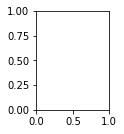

In [59]:
import cv2

do_preds = preds[:8]

for i, pred in enumerate(do_preds):
    plt.subplot(2, 4, i + 1)
    prob = zip(class_col, list(pred))
    # item --> prob
    # contributor: '뱅커'님
    prob = sorted(list(prob), key = lambda z: z[1], reverse = True)[:2]
    
    image = cv2.imread(test_df['image'][i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.imshow(image)
    plt.title(f'{prob[0][0]}: {round(prob[0][1] * 100, 2)}% \n {prob[1][0]}: {round(prob[1][1] * 100, 2)}%')
    
plt.tight_layout()